# TODO: Task 1 - Approximating Functions

In [4]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.spatial.distance import cdist
import utils
%reload_ext autoreload
%autoreload 2

# Load datasets with linear and non-linear function data
data_A = np.loadtxt('../../data/linear_function_data.txt')
data_B = np.loadtxt('../../data/nonlinear_function_data.txt')

In [36]:
data_A

array([[ 1.62434536,  1.21825749],
       [-0.61175641, -0.45884164],
       [-0.52817175, -0.39612373],
       ...,
       [-0.06962454, -0.05222762],
       [ 0.35387043,  0.26540929],
       [-0.18695502, -0.14020239]])

### TODO: Part 1 - Approximating function in dataset A with a linear function

Text(0.5, 1.0, 'Linear function')

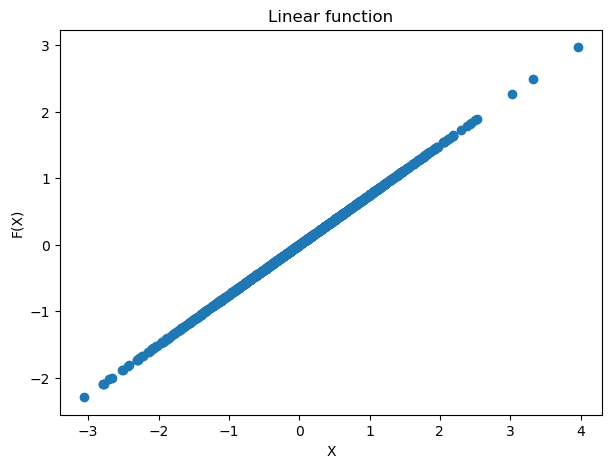

In [21]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_A = data_A[:,0]
Y_A = data_A[:,1]

ax.scatter(X_A, Y_A)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

In [6]:
# Function to add jitter
def add_jitter(arr, noise_level=0.05):
    return arr + np.random.normal(0, noise_level, arr.shape)

Text(0.5, 1.0, 'Linear function')

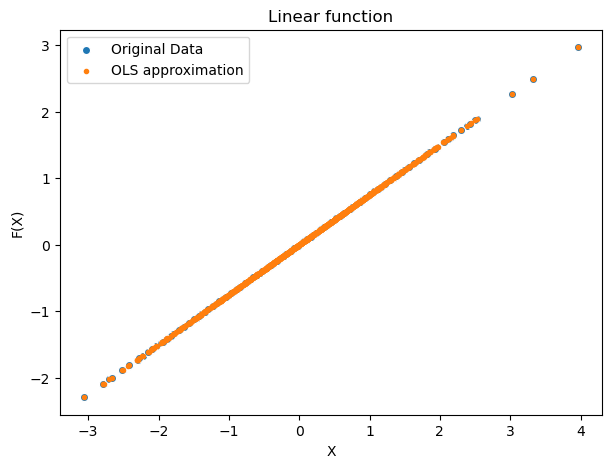

In [40]:
coef = utils.least_squares(X_A[:, np.newaxis], Y_A)[0]
approx_y_1 = np.dot(X_A, coef)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A,label = 'Original Data', edgecolor = 'w')
ax.scatter(X_A, approx_y_1, label= 'OLS approximation', marker = '.')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

### TODO: Part 2 -  Approximating function in dataset B with a linear function

Text(0.5, 1.0, 'Non Linear function')

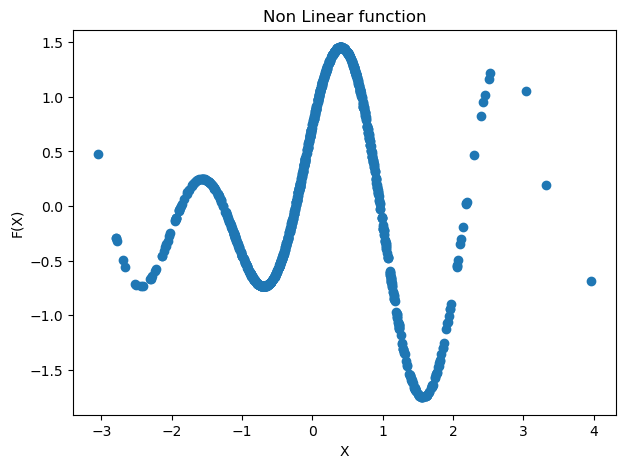

In [41]:
fig, ax = plt.subplots(1,1, figsize =(7,5))
X_B = data_B[:,0]
Y_B = data_B[:,1]

ax.scatter(X_B, Y_B)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

Text(0.5, 1.0, 'Linear function')

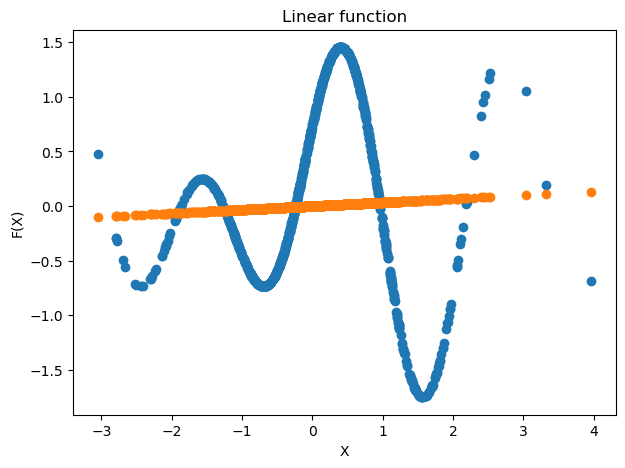

In [45]:
coef_2 = utils.least_squares(X_B[:,np.newaxis], Y_B)[0]
approx_y_2 = np.dot(X_B,coef_2)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B)
ax.scatter(X_B, approx_y_2)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")

### TODO: Part 3.1 - Approximating function in dataset B with radial basis functions

f(x) = c_1 * phi_1(x)+ c_2 * phi_2(x)+ ... + c_L * phi_L(x)
     = PHI(X) @ C.T

PHI(X) = (phi_1(x), phi_2(x), ..., phi_L(x))

find C!

must also tune parameters epsilon and L

Text(0.5, 1.0, 'Non Linear function')

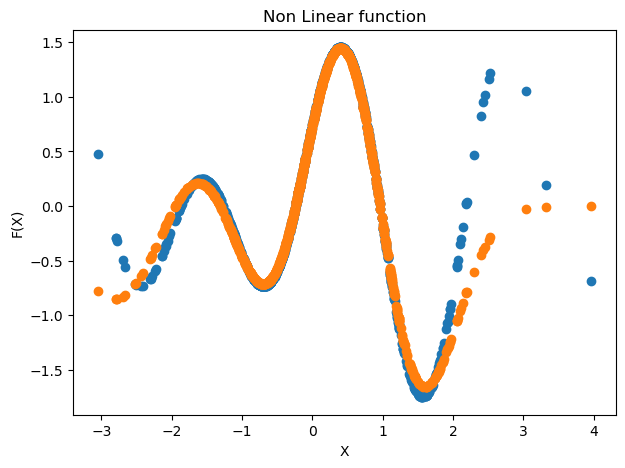

In [54]:
L = 10
phi_x_b = utils.approx_non_linear_function(X_B,Y_B,L,0.11)
C =  utils.least_squares(phi_x_b.T, Y_B)
approx_y_3 = np.dot(phi_x_b.T, C)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B)
ax.scatter(X_B, approx_y_3)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

In [47]:
C

array([-0.08396939, -0.39586689, -0.33867959,  0.51428181, -0.18883144,
       -0.8847642 ,  0.50109457,  1.13098539,  0.39972482, -1.94214247])

In [20]:
phi_x_b.T

array([[6.30056738e-31, 8.33215385e-25, 2.23661569e-19, ...,
        1.27528960e-02, 2.39431735e-01, 9.12454197e-01],
       [5.89631162e-09, 6.31639946e-06, 1.37345747e-03, ...,
        2.73143184e-02, 4.15407948e-04, 1.28237695e-06],
       [1.57611810e-09, 2.20311220e-06, 6.25087687e-04, ...,
        4.70229208e-02, 9.33152740e-04, 3.75882700e-06],
       ...,
       [5.14149167e-13, 3.09381588e-09, 3.77882046e-06, ...,
        4.20254377e-01, 3.59015208e-02, 6.22543802e-04],
       [9.45416937e-17, 2.19040903e-12, 1.03010983e-08, ...,
        9.69442605e-01, 3.18874080e-01, 2.12898599e-02],
       [4.55452374e-12, 1.88640454e-08, 1.58592689e-05, ...,
        2.72503339e-01, 1.60235583e-02, 1.91250495e-04]])

Built in RBF from scipy:

Text(0.5, 1.0, 'Non Linear function')

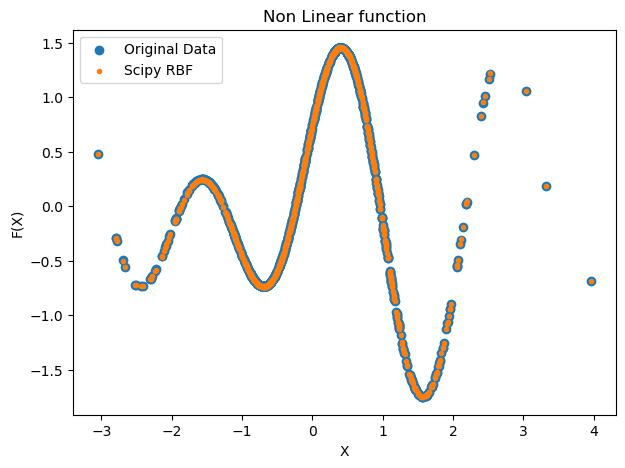

In [18]:
#we cheat with interpolation built-in function
approx_y_cheat = utils.built_int_interpolator(np.array([X_B]).T,Y_B,0.9)

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_B,Y_B, label = 'Original Data')
ax.scatter(X_B, approx_y_cheat, marker= '.', label= 'Scipy RBF')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Non Linear function")

Text(0.5, 1.0, 'Linear function')

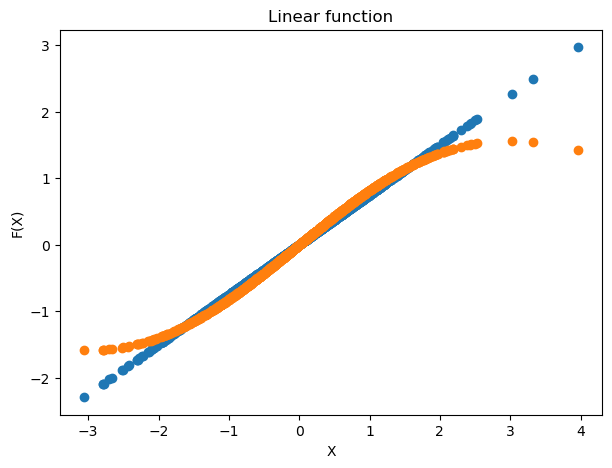

In [180]:
L = 100
phi_x_a = utils.approx_non_linear_function(X_A,Y_A,L,2)
approx_y_3 = utils.transform(phi_x_a.T, utils.least_squares(phi_x_a.T, Y_A))

fig, ax = plt.subplots(1,1, figsize =(7,5))
ax.scatter(X_A,Y_A)
ax.scatter(X_A, approx_y_3)
ax.set_xlabel("X")
ax.set_ylabel("F(X)")
ax.set_title("Linear function")